In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
import requests
from pywaffle import Waffle
import numpy as np
import squarify
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from matplotlib.pyplot import figure
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.colors as colors

%matplotlib inline

In [3]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#52bbb7', '#8fdeb4', '#f16764', '#ca4862', '#461d2d', '#9C2964', '#1B7EBE', '#E4C34A']),
    'ps.fonttype': 42,
    'grid.linestyle': '--',
    'axes.facecolor': '#8fdeb4',
    'figure.facecolor': '#8fdeb4',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : True,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30,
    'text.color': '#1B7EBE',
    'axes.labelcolor': '#1B7EBE',
    'xtick.color': '#1B7EBE',
    'ytick.color': '#1B7EBE'
    
})

In [4]:
df = pd.read_csv('Shakespeare_Collection.csv')
df.head()

,id,title,text,url,tags
0,NaN,Shakespeare/1H4.pdf,Folger Shakespeare Library\nhttp://www.folgerd...,NaN,NaN
1,NaN,Shakespeare/1H6.pdf,Folger Shakespeare Library\nhttp://www.folgerd...,NaN,NaN
2,NaN,Shakespeare/2H4.pdf,Folger Shakespeare Library\nhttp://www.folgerd...,NaN,NaN
3,NaN,Shakespeare/2H6.pdf,Folger Shakespeare Library\nhttp://www.folgerd...,NaN,NaN
4,NaN,Shakespeare/3H6.pdf,Folger Shakespeare Library\nhttp://www.folgerd...,NaN,NaN


In [5]:
default_stopwords = list(stopwords.words('english'))

def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words]
    return words

In [6]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words]
    return words

all_rows = []

def get_hapaxes(row):
    hapax_dict = {}
    default_stopwords = list(stopwords.words('english'))
    words = tokenize(row.text)
    title = tokenize(row.title)
    fdist = nltk.FreqDist(words)
    how_many_words = len(words)
    how_many_unique_words = len(fdist)
    hapaxes = fdist.hapaxes()
    how_many_hapaxes = len(hapaxes)
    hapax_over_unique = how_many_hapaxes / how_many_unique_words
    hapax_over_all = how_many_hapaxes / how_many_words
    #unique_words = 
    #hapaxes =
    
    hapax_dict['hapax_over_all'] = hapax_over_all
    hapax_dict['hapax_over_unique'] = hapax_over_unique
    hapax_dict['how_many_hapaxes'] = how_many_hapaxes
    hapax_dict['how_many_unique_words'] = how_many_unique_words
    hapax_dict['how_many_words'] = how_many_words
    hapax_dict['fdist'] = fdist
    hapax_dict['title'] = title
    all_rows.append(hapax_dict)
    
    
    return hapax_dict
    

In [7]:
df.apply(get_hapaxes, axis=1)

0     {'hapax_over_all': 0.16062700151693915, 'hapax...
1     {'hapax_over_all': 0.16110414052697616, 'hapax...
2     {'hapax_over_all': 0.1579193150862628, 'hapax_...
3     {'hapax_over_all': 0.15156424284272588, 'hapax...
4     {'hapax_over_all': 0.14233516027238, 'hapax_ov...
5     {'hapax_over_all': 0.153912468749102, 'hapax_o...
6     {'hapax_over_all': 0.1533782114624506, 'hapax_...
7     {'hapax_over_all': 0.14865466573373196, 'hapax...
8     {'hapax_over_all': 0.1654573757948339, 'hapax_...
9     {'hapax_over_all': 0.15875317143892714, 'hapax...
10    {'hapax_over_all': 0.15858666861072634, 'hapax...
11    {'hapax_over_all': 0.15964736175969974, 'hapax...
12    {'hapax_over_all': 0.16480809472094932, 'hapax...
13    {'hapax_over_all': 0.15572619932292958, 'hapax...
14    {'hapax_over_all': 0.16456152200833052, 'hapax...
15    {'hapax_over_all': 0.1541553578177071, 'hapax_...
16    {'hapax_over_all': 0.1661460559629106, 'hapax_...
17    {'hapax_over_all': 0.16717748676511562, 'h

In [8]:
hapax_df = pd.DataFrame(all_rows)
hapax_df.head()

,fdist,hapax_over_all,hapax_over_unique,how_many_hapaxes,how_many_unique_words,how_many_words,title
0,"{'folger': 18, 'shakespeare': 25, 'library': 6...",0.160627,0.764439,5718,7480,35598,[shakespeare/1h4.pdf]
1,"{'folger': 18, 'shakespeare': 25, 'library': 6...",0.161104,0.736555,5136,6973,31880,[shakespeare/1h6.pdf]
2,"{'folger': 18, 'shakespeare': 25, 'library': 6...",0.157919,0.760970,6087,7999,38545,[shakespeare/2h4.pdf]
3,"{'folger': 18, 'shakespeare': 25, 'library': 6...",0.151564,0.737720,5707,7736,37654,[shakespeare/2h6.pdf]
4,"{'folger': 18, 'shakespeare': 25, 'library': 6...",0.142335,0.738581,5142,6962,36126,[shakespeare/3h6.pdf]


In [15]:
hapax_df.fdist[0].hapaxes()

['http',
 'www.folgerdigitaltexts.org',
 'contents',
 'witmore',
 'imagine',
 'composition',
 'poems',
 'traveled',
 'globe',
 'inviting',
 'ongoing',
 'taking',
 'finding',
 'feelings',
 'strikes',
 'unusual',
 'struggle',
 'mile',
 'minute',
 'paint',
 'pictures',
 'shift',
 'expertly',
 'presented',
 'public',
 'artistic',
 'adaptation',
 'classic',
 'available',
 'electronic',
 'anyone',
 'wants',
 'basis',
 'realized',
 'origin',
 'washington',
 'dc',
 'greatest',
 'documentary',
 'source',
 'unparalleled',
 'manuscripts',
 'artwork',
 'connected',
 'holdings',
 'consulted',
 'extensively',
 'reflect',
 'expertise',
 'gained',
 'regular',
 'performance',
 'elizabethan',
 'theater',
 'express',
 'thanks',
 'creating',
 'indispensable',
 'incorporate',
 'scholarship',
 'richness',
 'commentary',
 'inspired',
 'engaging',
 'paths',
 'distinguished',
 'visiting',
 'in-person',
 'physical',
 'resources',
 'exists',
 'supplement',
 'material',
 'commend',
 'inspire',
 'release',
 'prima

In [9]:
hapax_df.title = hapax_df.title.astype(str)

In [10]:
hapax_df.title = hapax_df.title.str.replace('[', '')
hapax_df.title = hapax_df.title.str.replace(']', '')
hapax_df.title = hapax_df.title.str.replace('.pdf', '')

In [11]:
hapax_df.set_index('title', inplace=True)

Text(0.5,1,'How many hapaxes are in popular books')

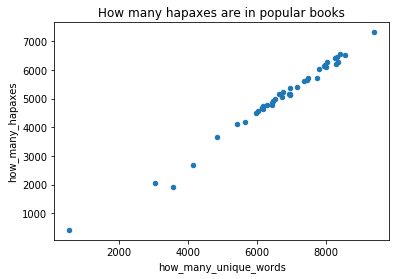

In [18]:
ax = hapax_df.plot(kind='scatter', x='how_many_unique_words', y='how_many_hapaxes')
ax.set_title("How many hapaxes are in popular books")

Text(0.5,1,'How many hapaxes are in popular books')

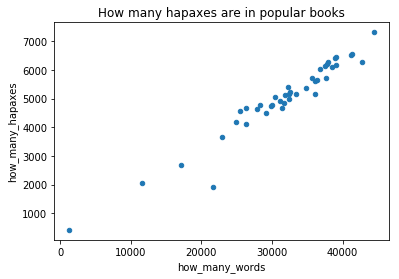

In [20]:
ax = hapax_df.plot(kind='scatter', x='how_many_words', y='how_many_hapaxes')
ax.set_title("How many hapaxes are in popular books")

Text(0.5,1,'Percent of distinct words that are hapaxes')

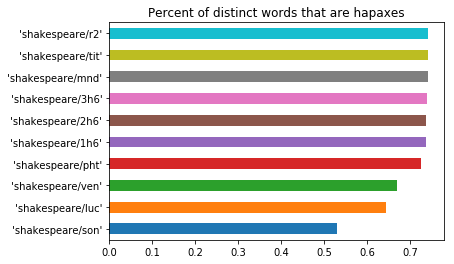

In [23]:
ax = hapax_df.hapax_over_unique.sort_values(ascending=True).head(10).plot(kind='barh')

ax.set_ylabel('')
ax.set_title('Percent of distinct words that are hapaxes')

In [36]:
hapax_df.to_csv('shakespeare_hapaxes.csv', index=False)

In [13]:
fdist.hapaxes()

NameError: name 'fdist' is not defined